In [35]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
data_path = '../data/Placement_Data_Full_Class.csv'
df = pd.read_csv(data_path)
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Data Exploratory

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

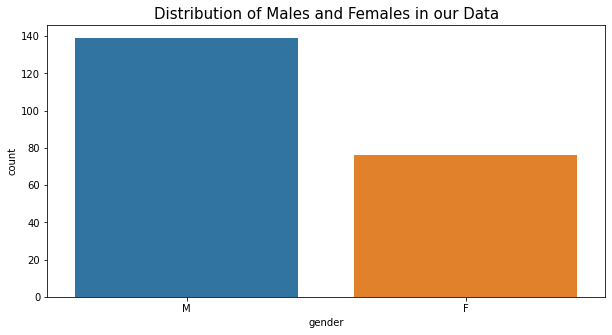

In [5]:
plt.figure(figsize=(10, 5))
sns.countplot('gender', data=df)
plt.title("Distribution of Males and Females in our Data", fontsize=15)
plt.show()


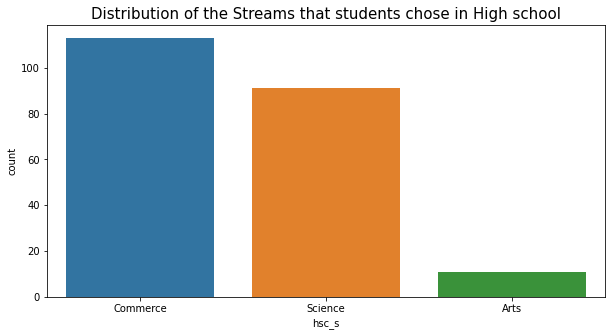

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot('hsc_s', data=df)
plt.title(
    "Distribution of the Streams that students chose in High school", fontsize=15)
plt.show()

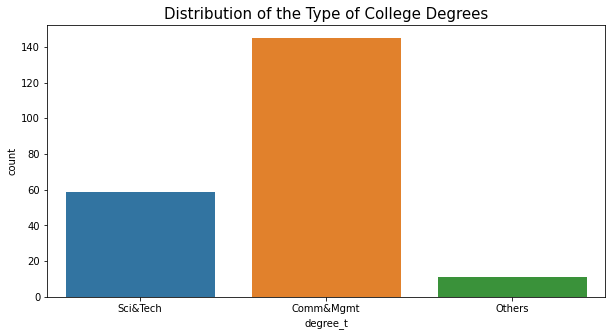

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot('degree_t', data=df)
plt.title("Distribution of the Type of College Degrees", fontsize=15)
plt.show()


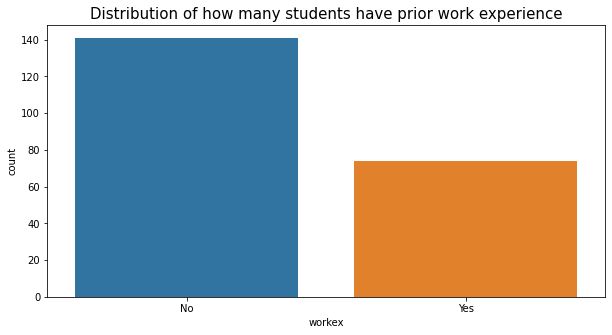

In [8]:
plt.figure(figsize=(10,5))
sns.countplot('workex',data = df,)
plt.title("Distribution of how many students have prior work experience",fontsize = 15)
plt.show()


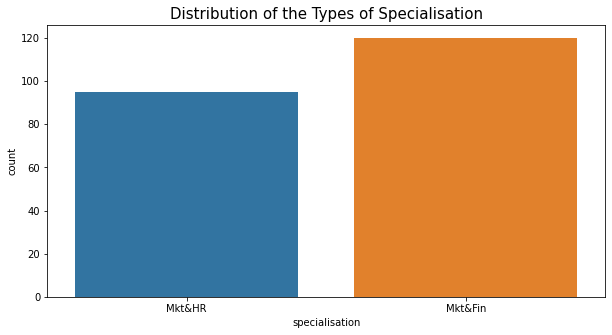

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot('specialisation', data=df)
plt.title("Distribution of the Types of Specialisation", fontsize=15)
plt.show()


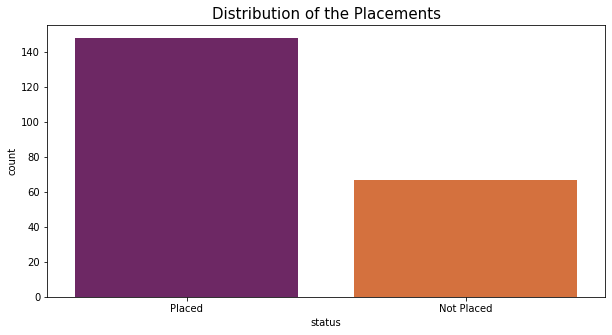

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot('status', data=df, palette='inferno')
plt.title("Distribution of the Placements", fontsize=15)
plt.show()


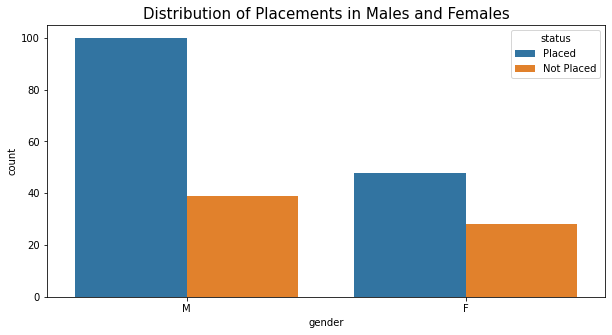

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot('gender', data=df, hue='status')
plt.title("Distribution of Placements in Males and Females", fontsize=15)
plt.show()


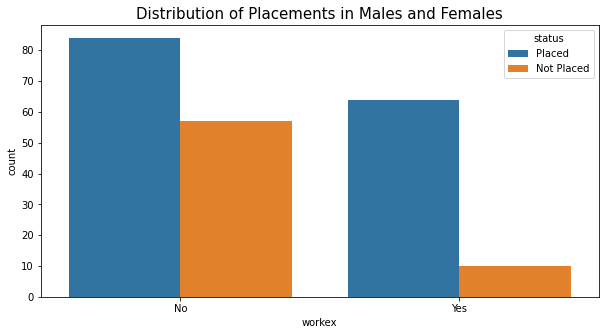

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot('workex', data=df, hue='status')
plt.title("Distribution of Placements in Males and Females", fontsize=15)
plt.show()


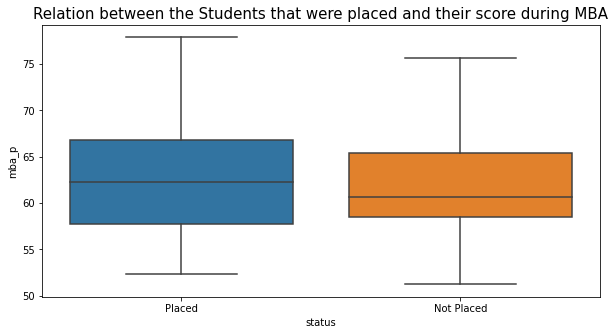

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot('status', 'mba_p', data=df)
plt.title("Relation between the Students that were placed and their score during MBA", fontsize=15)
plt.show()


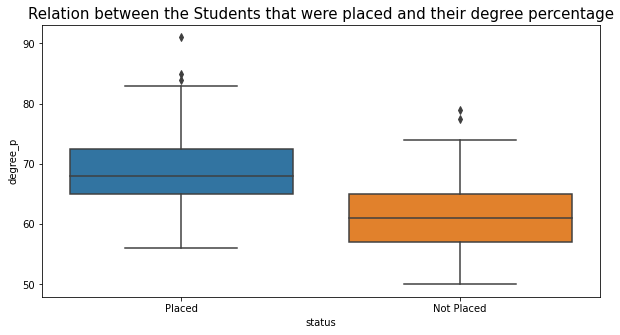

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot('status', 'degree_p', data=df)
plt.title("Relation between the Students that were placed and their degree percentage", fontsize=15)
plt.show()


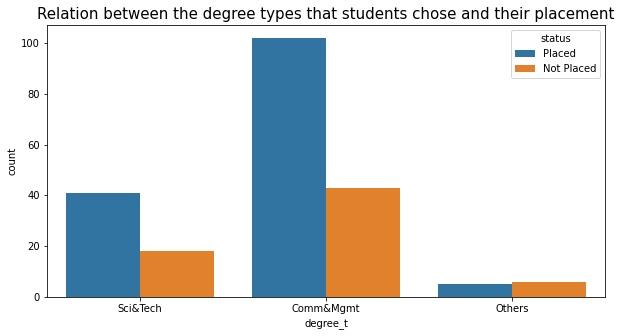

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot('degree_t', data=df, hue='status')
plt.title("Relation between the degree types that students chose and their placement", fontsize=15)
plt.show()


# Data Cleaning and Preprocessing

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score,recall_score,precision_score

Kita tidak akan menggunakan semua nilai. Hanya kolom `ssc_p`, `hsc_p`, `degree_p`, `workex`, `mba_p`, `etest_p`, `gender`, `degree_t`, dan `specialisation` yang akan digunakan sebagai fitur untuk memprediksi apakah kandidat akan ditempatkan atau tidak. Hal ini dilakukan karena tidak semua parameter akan berguna pada prediksi kita.

In [18]:
df1 = df.copy()
df1.drop(['sl_no', 'salary'], axis=1, inplace=True)
df1.head()


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


Encoding data agar mudah digunakan membuat model.

In [19]:
df1['status'] = df1['status'].map({'Placed': 1, 'Not Placed': 0})
df1['workex'] = df1['workex'].map({'Yes': 1, 'No': 0})
df1['gender'] = df1['gender'].map({'M': 1, 'F': 0})
df1['hsc_b'] = df1['hsc_b'].map({'Central': 1, 'Others': 0})
df1['ssc_b'] = df1['ssc_b'].map({'Central': 1, 'Others': 0})
df1['degree_t'] = df1['degree_t'].map(
    {'Sci&Tech': 0, 'Comm&Mgmt': 1, 'Others': 2})
df1['specialisation'] = df1['specialisation'].map({'Mkt&HR': 1, 'Mkt&Fin': 0})
df1['hsc_s'] = df1['hsc_s'].map({'Commerce': 0, 'Science': 1, 'Arts': 2})
df1.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,0,58.00,0,0,55.0,1,58.80,1
1,1,79.33,1,78.33,0,1,77.48,0,1,86.5,0,66.28,1
2,1,65.00,1,68.00,1,2,64.00,1,0,75.0,0,57.80,1
3,1,56.00,1,52.00,1,1,52.00,0,0,66.0,1,59.43,0
4,1,85.80,1,73.60,1,0,73.30,1,0,96.8,0,55.50,1


Mendefinikan fitur dan target.

In [20]:
X = df1[['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p',
         'etest_p', 'gender', 'degree_t', 'specialisation']]
y = df1['status']


Memisahkan data train dan test.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101)


Scaling fitur untuj mendapatkan akurasi yang lebih tinggi dan hasil yang lebih baik.

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Building Model

In [54]:
scoring = 'accuracy'

models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC()))
models.append(('Gaussian NB', GaussianNB()))

results = []
names = []
for name, model, in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("{}: {} ({})".format(name, cv_results.mean(), cv_results.std()))

Logistic Regression: 0.8483660130718954 (0.09201769494786945)
Support Vector Machine: 0.8660130718954248 (0.08326602433563965)
Gaussian NB: 0.8071895424836601 (0.1183530018148036)


Logistic Regression
[[13  3]
 [ 2 25]]
True Positive Rate: 92.59%
True Negative Rate: 81.25%
Accuracy: 88.37%
Precision: 89.29%
Recall: 92.59%
AUC: 86.92%


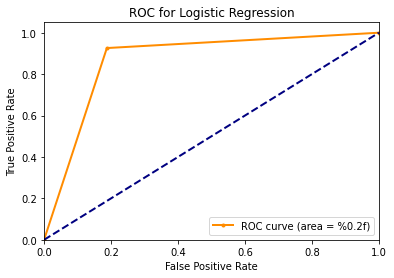



Support Vector Machine
[[11  5]
 [ 4 23]]
True Positive Rate: 85.19%
True Negative Rate: 68.75%
Accuracy: 79.07%
Precision: 82.14%
Recall: 85.19%
AUC: 76.97%


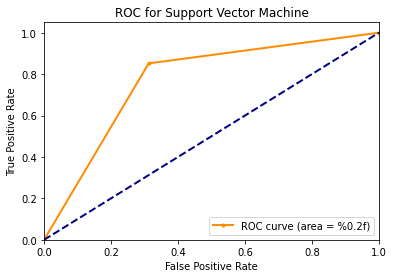



Gaussian NB
[[13  3]
 [ 2 25]]
True Positive Rate: 92.59%
True Negative Rate: 81.25%
Accuracy: 88.37%
Precision: 89.29%
Recall: 92.59%
AUC: 86.92%


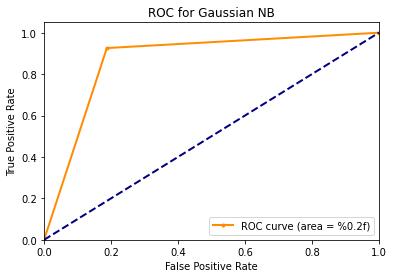

In [93]:
for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name)
    cm = confusion_matrix(y_test, pred)
    print(cm)

    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    sens = tp/(tp+fn)
    spec = tn/(tn+fp)
    print(f"True Positive Rate: {round(sens*100, 2)}%")
    print(f"True Negative Rate: {round(spec*100, 2)}%")

    print(f"Accuracy: {round(accuracy_score(y_test, pred)*100, 2)}%")
    print(f"Precision: {round(precision_score(y_test, pred)*100, 2)}%")
    print(f"Recall: {round(recall_score(y_test, pred)*100, 2)}%")

    fpr, tpr, thresholds = roc_curve(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    print(f"AUC: {round(auc*100, 2)}%")

    fig = plt.figure()
    plt.title(f'ROC for {name}')
    plt.plot(fpr, tpr, color='darkorange', marker='.',
             lw=2, label='ROC curve (area = %0.2f)')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    fig.savefig(f"../output/ROC for {name}.png", transparent=True)

    print("\n")
